In [32]:
#Importações utilizadas

#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.circuit.library import StatePreparation
from qiskit.quantum_info.operators import Operator

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import array_to_latex

In [33]:
#Declaracao de Funcoes utilizadas durante a execução
#Estas funcoes foram elaboradas durante o estudo e a implementacao dos algoritmos

#Funcao auxiliar que gera e retorna a matriz diagonal R para a dada quantidade de qubits
def converteNumeroDiagonalOraculo(number,  qubits):
    if (2**qubits) < (number-1):
        return -1
    aux = np.ones(2**qubits,dtype=int)
    aux[number] = -1
    return aux

#aplica a porta hadamard em um circuito para a lista de qbits especificada
def inicializaSobreposicao (qc, qubits):
    for q in qubits:
        qc.h(q)
    return qc

#Aplica a matriz de difusao proposta por Shor no circuito
def matrizDifusao(qc ,qubits):
    # D = WRW
    # Matriz de difusao = Hadamard -> diagonal[1,-1,-1,-1] -> Hadamard
    nqubits = len(qubits)
    R = np.ones(2**nqubits,dtype=int)
    for i in range(1,2**n):
        R[i] = -1
    inicializaSobreposicao(qc, qubits)
    qc.diagonal(list(R), qubits)
    inicializaSobreposicao(qc, qubits)
    return qc

#Funcao auxiliar que copia e gera o vetor de estados de dado circuito, 
#evitando assim que o circuito original seja desfeito com a leitura
def printStateVector(qc):
    sim = Aer.get_backend('aer_simulator')
    qc.decompose()
    qc_sim = qc.copy()
    qc_sim = transpile(qc_sim,sim)
    qc_sim.save_statevector()
    qobj = assemble(qc_sim)
    result = sim.run(qobj).result()
    statevec = result.get_statevector()
    return array_to_latex(statevec, prefix="\\text{Statevector} = ")

#Funcao auxiliar que copia e gera as esferas de Bloch de dado circuito, 
#evitando assim que o circuito original seja desfeito com a leitura
def printBlochSphere(qc):
    sim = Aer.get_backend('aer_simulator')
    qc.decompose()
    qc_sim = qc.copy()
    qc_sim = transpile(qc_sim,sim)
    qc_sim.save_statevector()
    qobj = assemble(qc_sim)
    result = sim.run(qobj).result()
    statevec = result.get_statevector()
    return plot_bloch_multivector(statevec)


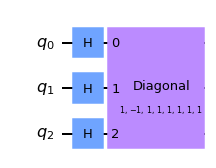

In [34]:
# numero de qubits
n=3

# criacao do circuito
algoritmoGrover = QuantumCircuit(n)

#circuito auxiliar para Matriz de difusão
mDif = QuantumCircuit(n)
mDif.name = "D"

# Vetor contendo todos os qbits, para facilitar na passagem de parametros, mas nao obrigatoria
allQbits = []
for i in range(n):
    allQbits.append(i)
    
#Definição do circuito de matriz de difusão
matrizDifusao(mDif, allQbits)

#Variaveis para Oraculo Teste
numeroProcurado = 1 #Altere este numero e execute as celulas subsequentes para ver o resultado em outros estados (o range vai de 0 a 7)
groverDiagonal = converteNumeroDiagonalOraculo(numeroProcurado,n)

#inicializando/oraculo teste
algoritmoGrover = inicializaSobreposicao(algoritmoGrover,allQbits)
algoritmoGrover.diagonal(list(groverDiagonal),allQbits)
algoritmoGrover.draw()

In [35]:
#Print do vetor de estados para analise
printStateVector(algoritmoGrover)

<IPython.core.display.Latex object>

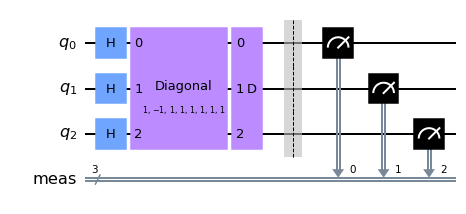

In [36]:
# Aplicando matriz de difusao de Grover ao circuito
algoritmoGrover.append(mDif, allQbits)
algoritmoGrover.measure_all()
algoritmoGrover.draw()

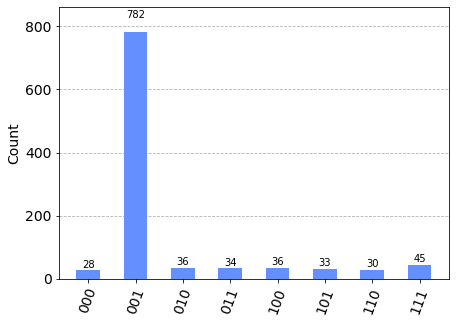

In [37]:
#execucao e leitura dos resultados
aer_sim = Aer.get_backend('aer_simulator')
transpiled_algoritmoGrover = transpile(algoritmoGrover, aer_sim)
qobj = assemble(transpiled_algoritmoGrover)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

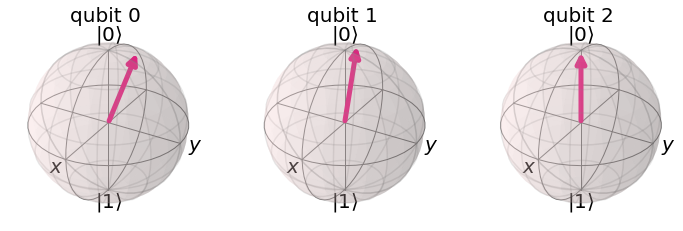

In [38]:
#numero de qubits
n = 3

# criacao do circuito para teste de algorimo de busca proposto
algoritmoRotation = QuantumCircuit(n)

#Declaracao do numero a ser buscado e do vetor de busca, para ver diferentes resultados, 
#altere os numeros daqui e reexecute as celulas subsequentes
numeroBusca = 7
vetorBusca = np.array([15,10,7])

#Normalizacao para o range
vetorNormalizado = vetorBusca/15
vetorRadiano = vetorNormalizado*(np.pi/2)

#Convertendo para valores radianos
numeroNormalizado = (15-numeroBusca)/15
numeroRadiano = numeroNormalizado*(np.pi/2)

# print(vetorRadiano) #caso queira analisar o vetor radiano, descomente essa linha


for i in range(n):
    algoritmoRotation.ry(vetorRadiano[i],i)
algoritmoRotation.barrier()
printBlochSphere(algoritmoRotation)

for i in range(n):
    algoritmoRotation.ry(numeroRadiano,i)

algoritmoRotation = inicializaSobreposicao(algoritmoRotation,list(range(n)))

# algoritmoRotation = matrizDifusao(algoritmoRotation,list(range(n)))

# algoritmoRotation.draw()

printBlochSphere(algoritmoRotation)

In [39]:
printStateVector(algoritmoRotation)

<IPython.core.display.Latex object>

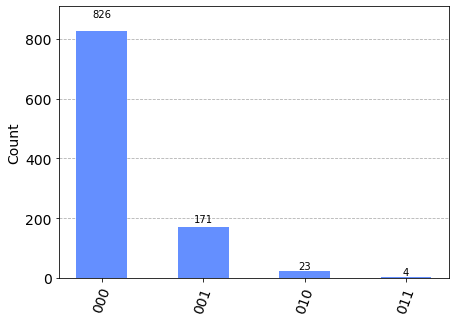

In [40]:
#execucao e leitura do algoritmo
algoritmoRotation.measure_all()
aer_sim = Aer.get_backend('aer_simulator')
transpiled_algoritmoRotation = transpile(algoritmoRotation, aer_sim)
qobj = assemble(transpiled_algoritmoRotation)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [41]:
n = 3

# criacao do circuito para teste de algorimo de busca proposto
algoritmoEncode = QuantumCircuit(n)

#Assimo como nos outros casos, altere estes numero para mudar o resultado
numeroBusca = 13
vetorBusca = [7,12,4,15,3,13,11,numeroBusca]

#aplicacao do vetora no circuito, convertendo para um vetor de estados, o resultado eh printado abaixo
vetorNormalizado = vetorBusca
vetorAmplitudes = vetorBusca
amplitudesQuadraticas = 0
for i in range(len(vetorBusca)):
    vetorNormalizado[i] = vetorBusca[i]/16
    amplitudesQuadraticas = amplitudesQuadraticas + vetorNormalizado[i]**2
amplitudesQuadraticas = np.sqrt(amplitudesQuadraticas)
for i in range(len(vetorBusca)):
    vetorAmplitudes[i] = vetorNormalizado[i]/amplitudesQuadraticas

print (vetorAmplitudes)

SP = StatePreparation(vetorAmplitudes)
algoritmoEncode.append(SP,range(3))
algoritmoEncode = algoritmoEncode.decompose(reps=5)
algoritmoEncode.barrier()

printStateVector(algoritmoEncode)

#algoritmoEncode.draw()

[0.2330745053742094, 0.3995562949272161, 0.13318543164240537, 0.4994453686590201, 0.09988907373180403, 0.43285265283781743, 0.36625993701661474, 0.43285265283781743]


<IPython.core.display.Latex object>

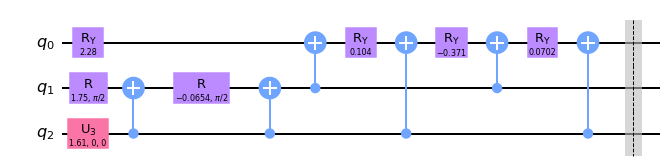

In [42]:

# for i in range(n-1):
#     algoritmoEncode.cz(i,n-1,ctrl_state=(int)(vetorAmplitudes[(2**n)-1])*100)


algoritmoEncode.decompose(reps=1)
algoritmoEncode.draw()

In [43]:
#Porta proposta e sua codificacao
#A porta foi elaborada durante o trabalho, mas sua convercao para matriz unitaria foi realizada utilizando uma calculadora de gram-Schmidt

A = [[1,0,0,0,0,0,0,0],
          [0,1,0,0,0,0,0,0],
          [0,0,1,0,0,0,0,0],
          [0,0,0,1,0,0,0,0],
          [0,0,0,0,1,0,0,0],
          [0,0,0,0,0,1,0,0],
          [0,0,0,0,0,0,1,0],
          [-1,-1,-1,-1,-1,-1,-1,1]
         ]

U =[[0.707106781186548,0,0,0,0,0,0,-0.707106781186548],
    [-0.408248290463863,0.816496580927726,0,0,0,0,0,-0.408248290463863],
    [-0.288675134594813,-0.288675134594813,0.866025403784439,0,0,0,0,-0.288675134594813],
    [-0.223606797749979,-0.223606797749979,-0.223606797749979,0.894427190999916,0,0,0,-0.223606797749979],
    [-0.182574185835055,-0.182574185835055,-0.182574185835055,-0.182574185835055,0.912870929175277,0,0,-0.182574185835055],
    [-0.154303349962092,-0.154303349962092,-0.154303349962092,-0.154303349962092,-0.154303349962092,0.925820099772551,0,-0.154303349962092],
    [-0.133630620956212,-0.133630620956212,-0.133630620956212,-0.133630620956212,-0.133630620956212,-0.133630620956212,0.935414346693485,-0.133630620956212],
    [0.353553390593274,0.353553390593274,0.353553390593274,0.353553390593274,0.353553390593274,0.353553390593274,0.353553390593274,0.353553390593274]]

#aplicacao das matrizes
#A transposicao se da porque o resultado da calculadora era transposto
Ut = np.array(U)
Ut = Ut.transpose()

algoritmoEncode.unitary(Ut,range(n))

printStateVector(algoritmoEncode)

<IPython.core.display.Latex object>

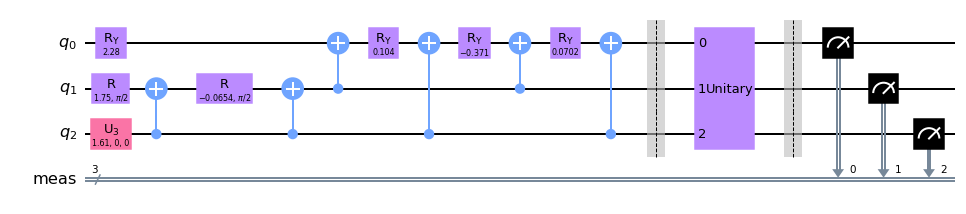

In [44]:
algoritmoEncode.measure_all()
algoritmoEncode.draw()

[0.2330745053742094, 0.3995562949272161, 0.13318543164240537, 0.4994453686590201, 0.09988907373180403, 0.43285265283781743, 0.36625993701661474, 0.43285265283781743]


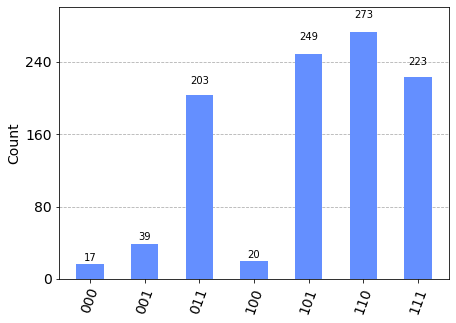

In [45]:
print(vetorBusca)

#Resultados do algoritmo
aer_sim = Aer.get_backend('aer_simulator')
transpiled_algoritmoEncode = transpile(algoritmoEncode, aer_sim)
qobj = assemble(transpiled_algoritmoEncode)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)